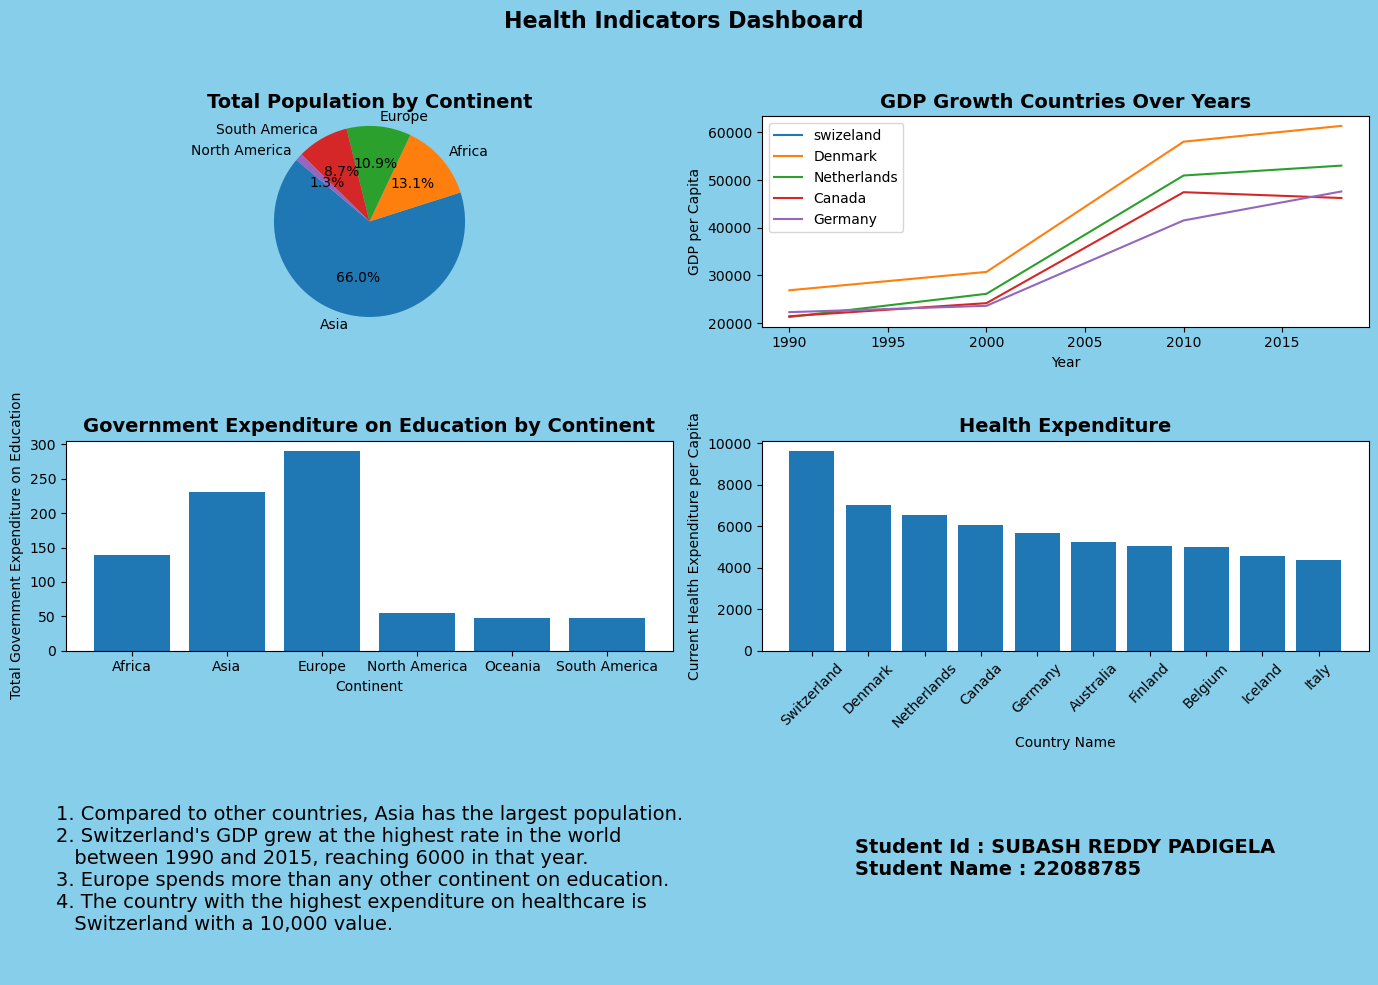

In [3]:
#Data source link : #https://www.kaggle.com/datasets/priyanka841/world-development-indicators-world-bank/data
#Github Link : #https://github.com/subashreddy222/Data-Handling-and-Visualisation.git
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('health Indicators WDI.xlsx')

# Group by Continent and sum the populations
continent_population = data.groupby('Continent')['Population'].sum()

# Group by Country and Year, then sum the GDP_per_capita values
gdp_data = data.groupby(['Country Name', 'Year'])['GDP per capita'].sum().unstack(level=0)

# Group by Continent and sum the government expenditure on education values
education_expenditure_data = data.groupby('Continent')['Government expenditure on education, total'].sum().reset_index()

# Select the top 10 countries based on the latest year health expenditure
top_countries = data[data['Year'] == 2018].nlargest(10, 'Current health expenditure per capita')

# Create a 3x2 grid for the dashboard
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10),facecolor='skyblue')

# Add a title to the dashboard
fig.suptitle('Health Indicators Dashboard', fontsize=16,fontweight='bold')

top_five_continents = continent_population.nlargest(5)
# Plot 1: Total Population by Continent
axes[0, 0].pie(top_five_continents.values, labels=top_five_continents.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Total Population by Continent',fontweight='bold',fontsize=14)
axes[0, 0].axis('equal')

# Plot 2: GDP Growth of Top 6 Countries Over Years
for country in ['swizeland','Denmark','Netherlands','Canada','Germany']:
    country_data = data[data['Country Name'] == country]
    axes[0, 1].plot(country_data['Year'], country_data['GDP per capita'], label=country)

axes[0, 1].set_title('GDP Growth Countries Over Years',fontweight='bold',fontsize=14)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('GDP per Capita')
axes[0, 1].legend()

# Plot 3: Government Expenditure on Education by Continent
axes[1, 0].bar(education_expenditure_data['Continent'], education_expenditure_data['Government expenditure on education, total'])
axes[1, 0].set_title('Government Expenditure on Education by Continent',fontweight='bold',fontsize=14)
axes[1, 0].set_xlabel('Continent')
axes[1, 0].set_ylabel('Total Government Expenditure on Education')

# Plot 4: Top 10 Countries with Highest Health Expenditure per Capita
axes[1, 1].bar(top_countries['Country Name'], top_countries['Current health expenditure per capita'])
axes[1, 1].set_title('Health Expenditure',fontweight='bold',fontsize=14)
axes[1, 1].set_xlabel('Country Name')
axes[1, 1].set_ylabel('Current Health Expenditure per Capita')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

text = "1. Compared to other countries, Asia has the largest population.\n" \
       "2. Switzerland's GDP grew at the highest rate in the world \n" \
       "   between 1990 and 2015, reaching 6000 in that year.\n" \
       "3. Europe spends more than any other continent on education.\n" \
       "4. The country with the highest expenditure on healthcare is\n" \
       "   Switzerland with a 10,000 value."
# Plot 5: Data Description Text
axes[2, 0].text(0.5, 0.5, text, ha='center', va='center', fontsize=14, color='black',multialignment = 'left')
axes[2, 0].axis('off')  # Turn off axis for the text subplot

text = "Student Id : SUBASH REDDY PADIGELA\n" \
       "Student Name : 22088785\n"
# Plot 5: Data Description Text
axes[2, 1].text(0.5, 0.5, text, ha='center', va='center', fontsize=14, color='black',multialignment = 'left',fontweight='bold')
axes[2, 1].axis('off')  # Turn off axis for the text subplot
# Adjust layout for better spacing
fig.subplots_adjust(top=1)  # Adjust the top parameter to control the space between title and graphs
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

